In [2]:
import torch
from torch import nn

In [3]:
device = 'cude' if torch.cuda.is_available() else 'cpu'
device

'cpu'

# get data

In [4]:
import requests
import zipfile
from pathlib import Path


#creating the folders
data_path = Path('data/')
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
  print(f'{image_path} is already exist...')
else:
  print(f'{image_path} does not exist, creating one...')
  image_path.mkdir(parents=True, exist_ok=True)

# downloading the data
with open(data_path/'pizza_steak_sushi.zip', 'wb') as f:
  request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
  print('downloading data...')
  f.write(request.content)

#unzip file
with zipfile.ZipFile(data_path/'pizza_steak_sushi.zip', 'r') as zip_ref:
  print('unzipping')
  zip_ref.extractall(image_path)

data/pizza_steak_sushi does not exist, creating one...
downloading data...
unzipping


# data preperation and data exploration

In [5]:
import os

def walk_through_dir(dir_path):
  """walks through dir_path returning its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in "{dirpath}"')

In [6]:
walk_through_dir(image_path)

There are 2 directories and 0 images in "data/pizza_steak_sushi"
There are 3 directories and 0 images in "data/pizza_steak_sushi/test"
There are 0 directories and 31 images in "data/pizza_steak_sushi/test/sushi"
There are 0 directories and 19 images in "data/pizza_steak_sushi/test/steak"
There are 0 directories and 25 images in "data/pizza_steak_sushi/test/pizza"
There are 3 directories and 0 images in "data/pizza_steak_sushi/train"
There are 0 directories and 72 images in "data/pizza_steak_sushi/train/sushi"
There are 0 directories and 75 images in "data/pizza_steak_sushi/train/steak"
There are 0 directories and 78 images in "data/pizza_steak_sushi/train/pizza"


In [7]:
#setup train and testing paths

train_dir = image_path / 'train'
test_dir = image_path / 'test'

train_dir, test_dir


(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

# visualizing and image

data/pizza_steak_sushi/test/pizza/2111981.jpg
pizza
random image path: data/pizza_steak_sushi/test/pizza/2111981.jpg
image class: pizza
image height: 512
image width: 512


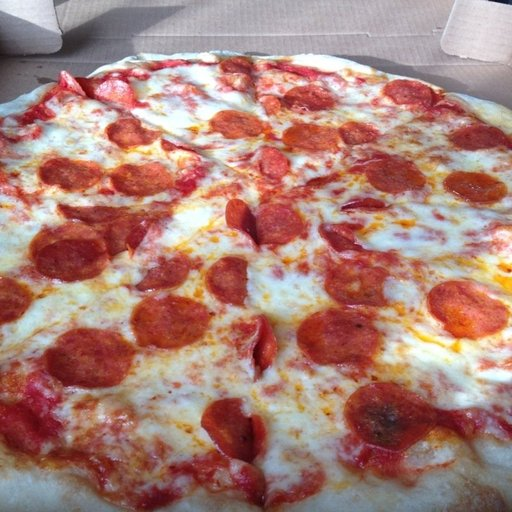

In [8]:
import random
from PIL import Image

random.seed(42)

#get all images
image_path_list = list(image_path.glob('*/*/*.jpg'))

#picking random image
random_image_path = random.choice(image_path_list)
print(random_image_path)

# get image class from the path name
image_class = random_image_path.parent.stem
print(image_class)

#open image
img = Image.open(random_image_path)

#print metadata
print(f'random image path: {random_image_path}')
print(f'image class: {image_class}' )
print(f'image height: {img.height}')
print(f'image width: {img.width}')
img

(-0.5, 511.5, 511.5, -0.5)

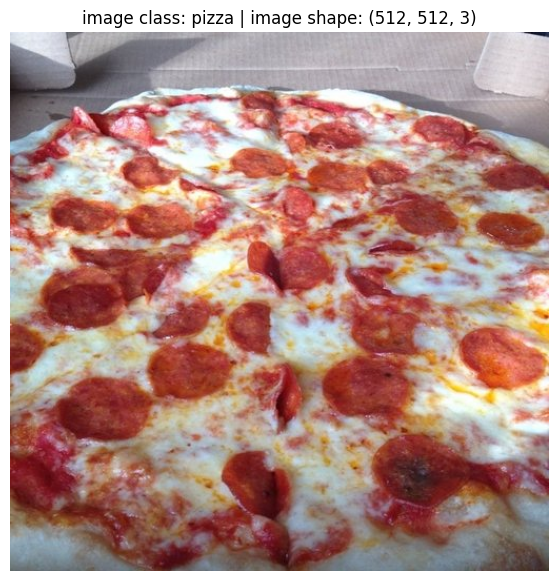

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# turn image to array
img_as_array = np.asarray(img)

#plot the image with matplotlib
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f'image class: {image_class} | image shape: {img_as_array.shape}')
plt.axis(False)

# transforming data

In [10]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [11]:
data_transform = transforms.Compose(
    [
        transforms.Resize(size=(64,64)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor()
    ]
)

In [12]:
data_transform(img).shape

torch.Size([3, 64, 64])

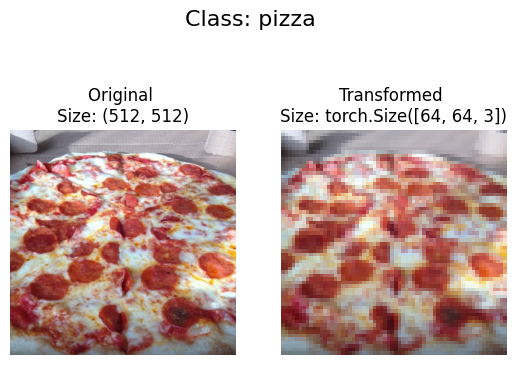

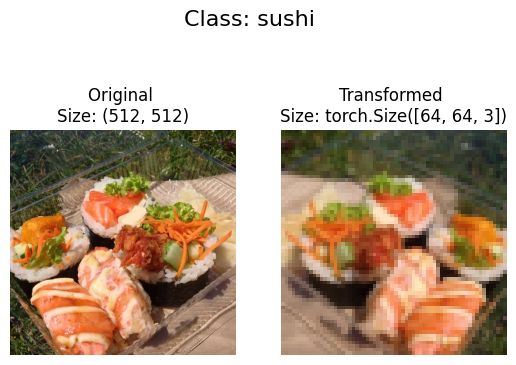

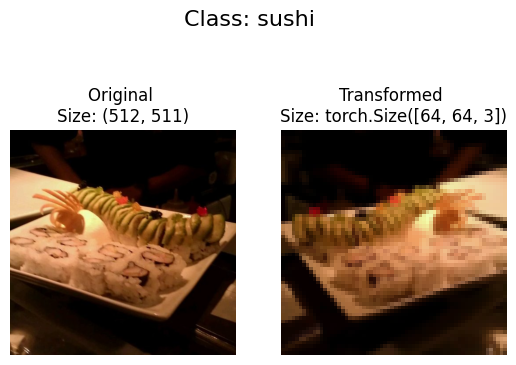

In [13]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths.
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)

# option 1: Loading image data using `torchvision.datasets.ImageFolder`

In [14]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,
                                  transform=data_transform,
                                )

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [15]:
class_name = train_data.classes
class_name

['pizza', 'steak', 'sushi']

In [16]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [17]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [25]:
img, label = train_data[0][0], train_data[0][1]
print(f'image tensor: \n{img}')
print(f'image shape: \n{img.shape}')
print(f'image datatype: \n{img.dtype}')
print(f'image label: \n{label}')
print(f'image datatype : \n{type(label)}')

image tensor: 
tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0

Original shape: torch.Size([3, 64, 64])
permuted shape: torch.Size([64, 64, 3])


Text(0.5, 1.0, 'pizza')

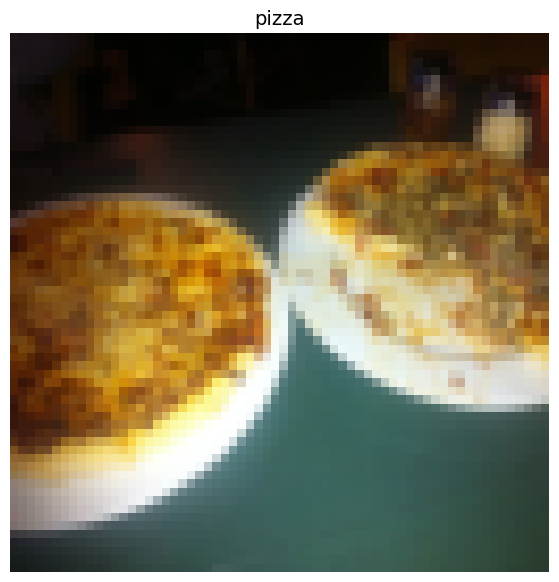

In [26]:
img_permute = img.permute(1,2,0)

print(f'Original shape: {img.shape}')
print(f'permuted shape: {img_permute.shape}')

plt.figure(figsize=(10,7))
plt.imshow(img_permute, cmap='gray')
plt.axis(False)
plt.title(class_name[label], fontsize=14)

# turn loaded image into DataLoader

Think of it like this, the higher value num_workers is set to, the more compute power PyTorch will use to load your data.

Personally, I usually set it to the total number of CPUs on my machine via Python's `os.cpu_count()`.

This ensures the DataLoader recruits as many cores as possible to load data.

In [27]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=1, # how many samples per batch?
                              num_workers=1, #how many subprocesses to use for data loading? (higher = more)
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=1,
                             num_workers=1,
                             shuffle=False)

In [28]:
img , label = next(iter(train_dataloader))
print(f'image shape: {img.shape}')
print(f'label shape: {label.shape}')

image shape: torch.Size([1, 3, 64, 64])
label shape: torch.Size([1])


#  Loading Image Data with a Custom Dataset without inbuilt modules

In [32]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [29]:
# Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

To do so, we'll:

1. Get the class names using `os.scandir()` to traverse a target directory (ideally the directory is in standard image classification format).
2. Raise an error if the class names aren't found (if this happens, there might be something wrong with the directory structure).
3. Turn the class names into a dictionary of numerical labels, one for each class.

In [30]:
# Setup path for target directory
target_directory = train_dir
print(f"Target directory: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(image_path / "train"))])
print(f"Class names found: {class_names_found}")

Target directory: data/pizza_steak_sushi/train
Class names found: ['pizza', 'steak', 'sushi']


In [33]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  #1. get the class names by scanning the target directore

  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  #2. Raise an error if class names not found
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}.")

  #3. create a dicitory of index labels
  class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
  return classes, class_to_idx

In [34]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})